In [5]:
import pandas as pd
import plotly.express as px

class ProductReviews:
    """A class to represent a set of product reviews.
    
    Attributes:
    -----------
    df : pandas.DataFrame
        The dataframe containing the product reviews.
        
    Methods:
    --------
    create_histogram(title)
        Creates a histogram of the product ratings and displays it.
        
    """
    def __init__(self, csv_file):
        """Initialize a new ProductReviews object.
        
        Parameters:
        -----------
        csv_file : str
            The path to the CSV file containing the product reviews.
        
        """
        self.df = pd.read_csv(csv_file)

    def create_histogram(self, title):
        """Create a histogram of the product ratings and display it.
        
        Parameters:
        -----------
        title : str
            The title to display above the histogram.
        
        Returns:
        --------
        None
        
        """
        fig = px.histogram(self.df, x="rating")
        fig.update_traces(marker_color="steelblue", marker_line_color='rgb(8,48,107)',
                          marker_line_width=1.5)
        fig.update_layout(title_text=title)
        fig.show()


class GrindrReviews(ProductReviews):
    """A class to represent Grindr product reviews.
    
    This class inherits from the ProductReviews class and uses the same methods.
    
    Attributes:
    -----------
    df : pandas.DataFrame
        The dataframe containing the Grindr product reviews.
        
    Methods:
    --------
    create_histogram(title)
        Creates a histogram of the Grindr product ratings and displays it.
        
    """
    def __init__(self, csv_file='grindr_reviews.csv'):
        """Initialize a new GrindrReviews object.
        
        Parameters:
        -----------
        csv_file : str, optional
            The path to the CSV file containing the Grindr product reviews. 
            Default is 'grindr_reviews.csv'.
        
        """
        super().__init__(csv_file)


class ScruffReviews(ProductReviews):
    """A class to represent Scruff product reviews.
    
    This class inherits from the ProductReviews class and uses the same methods.
    
    Attributes:
    -----------
    df : pandas.DataFrame
        The dataframe containing the Scruff product reviews.
        
    Methods:
    --------
    create_histogram(title)
        Creates a histogram of the Scruff product ratings and displays it.
        
    """
    def __init__(self, csv_file='scruff_reviews.csv'):
        """Initialize a new ScruffReviews object.
        
        Parameters:
        -----------
        csv_file : str, optional
            The path to the CSV file containing the Scruff product reviews. 
            Default is 'scruff_reviews.csv'.
        
        """
        super().__init__(csv_file)


class HornetReviews(ProductReviews):
    """A class to represent Hornet product reviews.
    
    This class inherits from the ProductReviews class and uses the same methods.
    
    Attributes:
    -----------
    df : pandas.DataFrame
        The dataframe containing the Hornet product reviews.
        
    Methods:
    --------
    create_histogram(title)
        Creates a histogram of the Hornet product ratings and displays it.
        
    """
    def __init__(self, csv_file='hornet_reviews.csv'):
        """Initialize a new HornetReviews object.
        
        Parameters:
        -----------
        csv_file : str, optional
            The path to the CSV file containing the Hornet product reviews. 
            Default is 'hornet_reviews.csv'.
        
        """
        super().__init__(csv_file)


In [6]:
#Create an instance of GrindrReviews class
grindr_reviews = GrindrReviews()

#Create a histogram for Grindr's product rating
grindr_reviews.create_histogram("Figure 9a. Grindr's Product Rating")

#Create an instance of ScruffReviews class
scruff_reviews = ScruffReviews()

#Create a histogram for Scruff's product rating
scruff_reviews.create_histogram("Figure 9b. Scruff's Product Rating")

#Create an instance of HornetReviews class
hornet_reviews = HornetReviews()

#Create a histogram for Hornet's product rating
hornet_reviews.create_histogram("Figure 9c. Hornet's Product Rating")

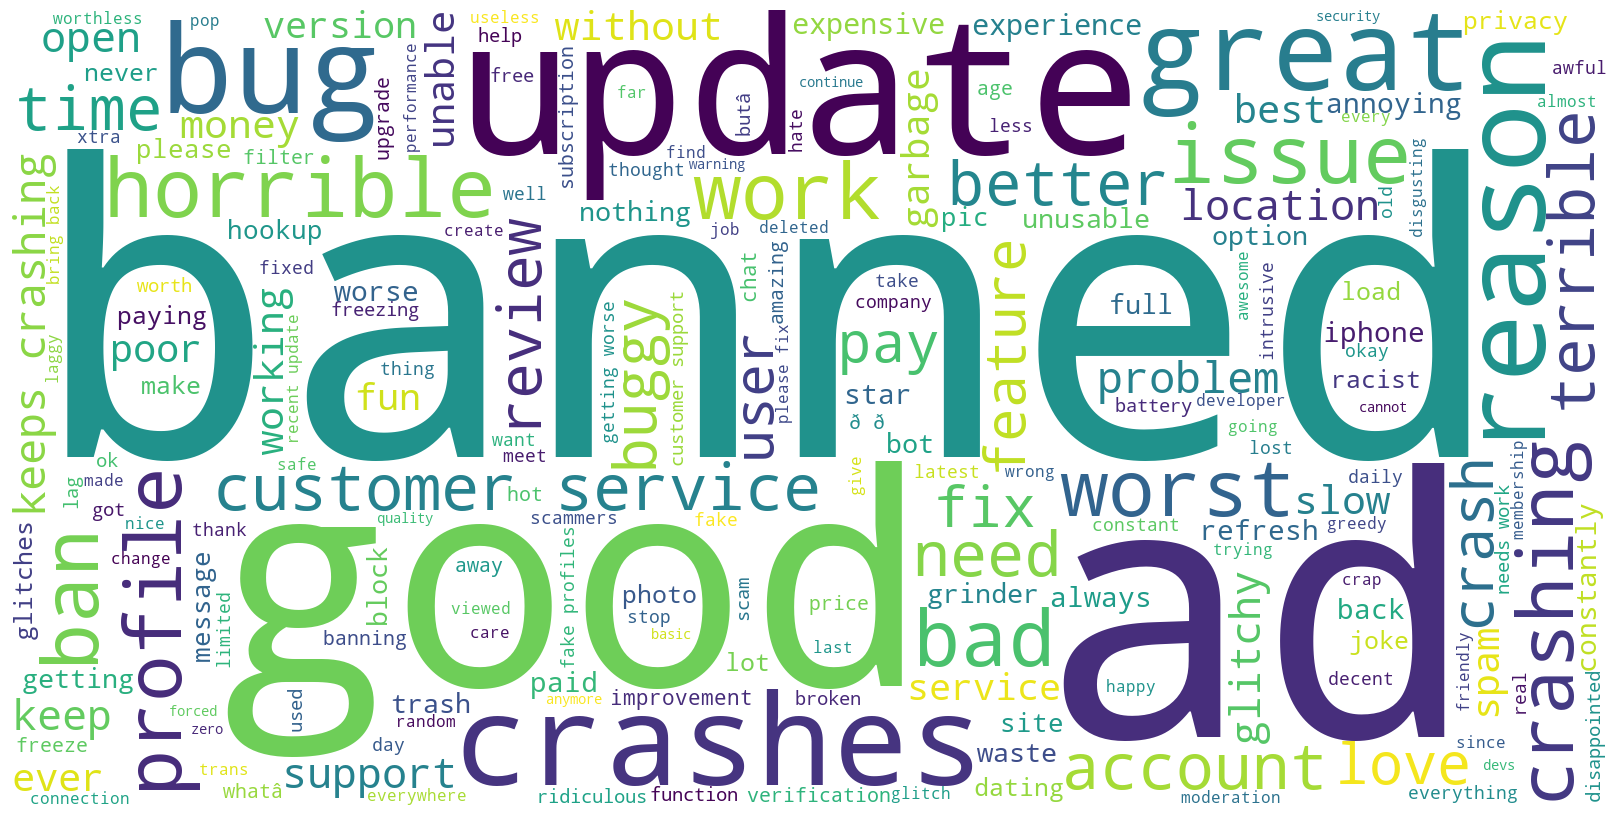

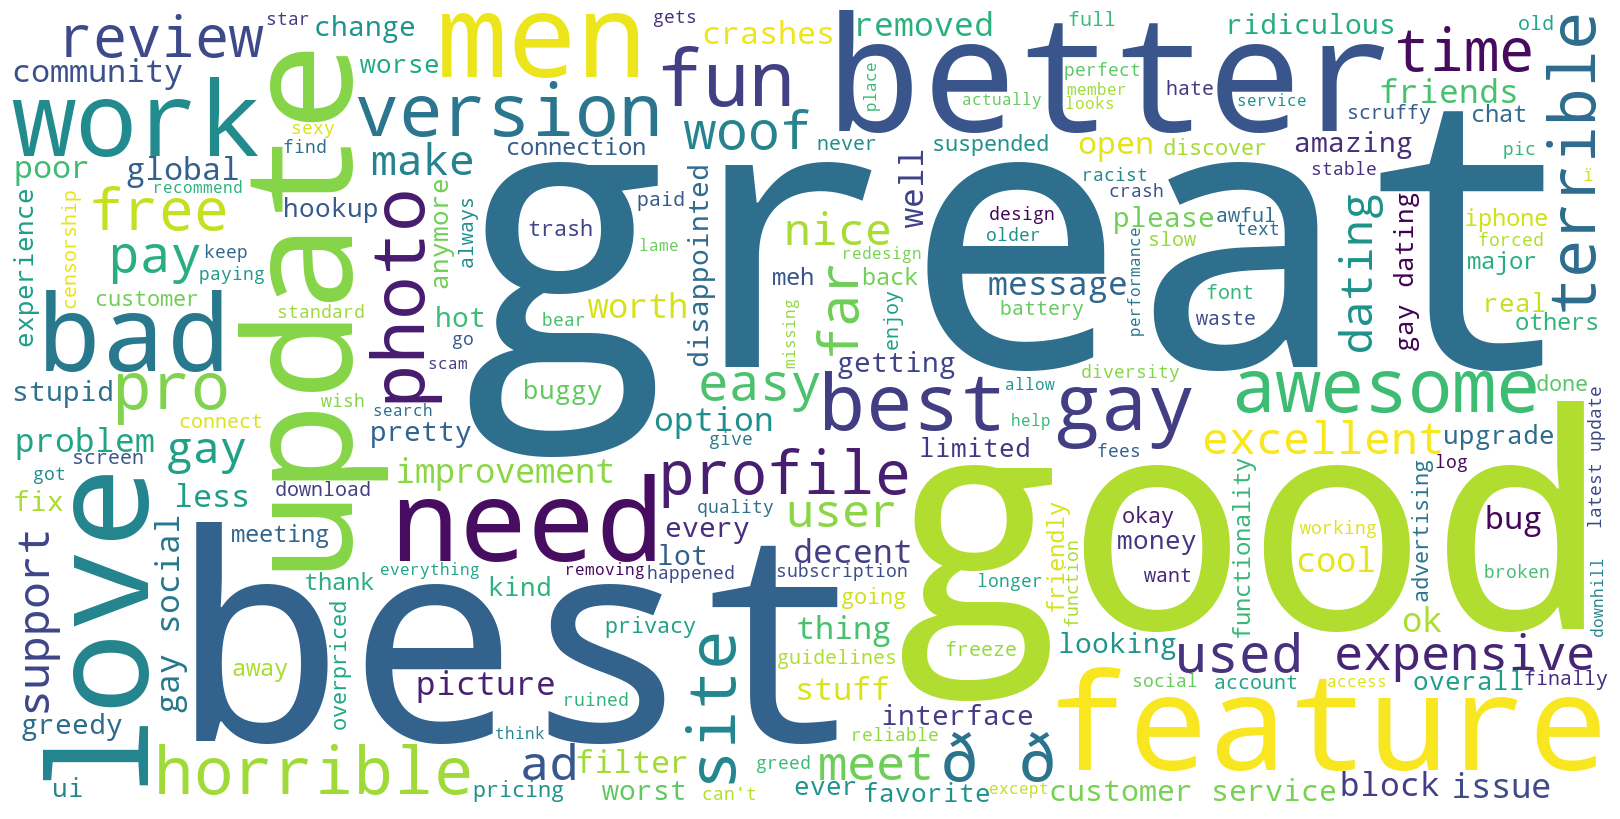

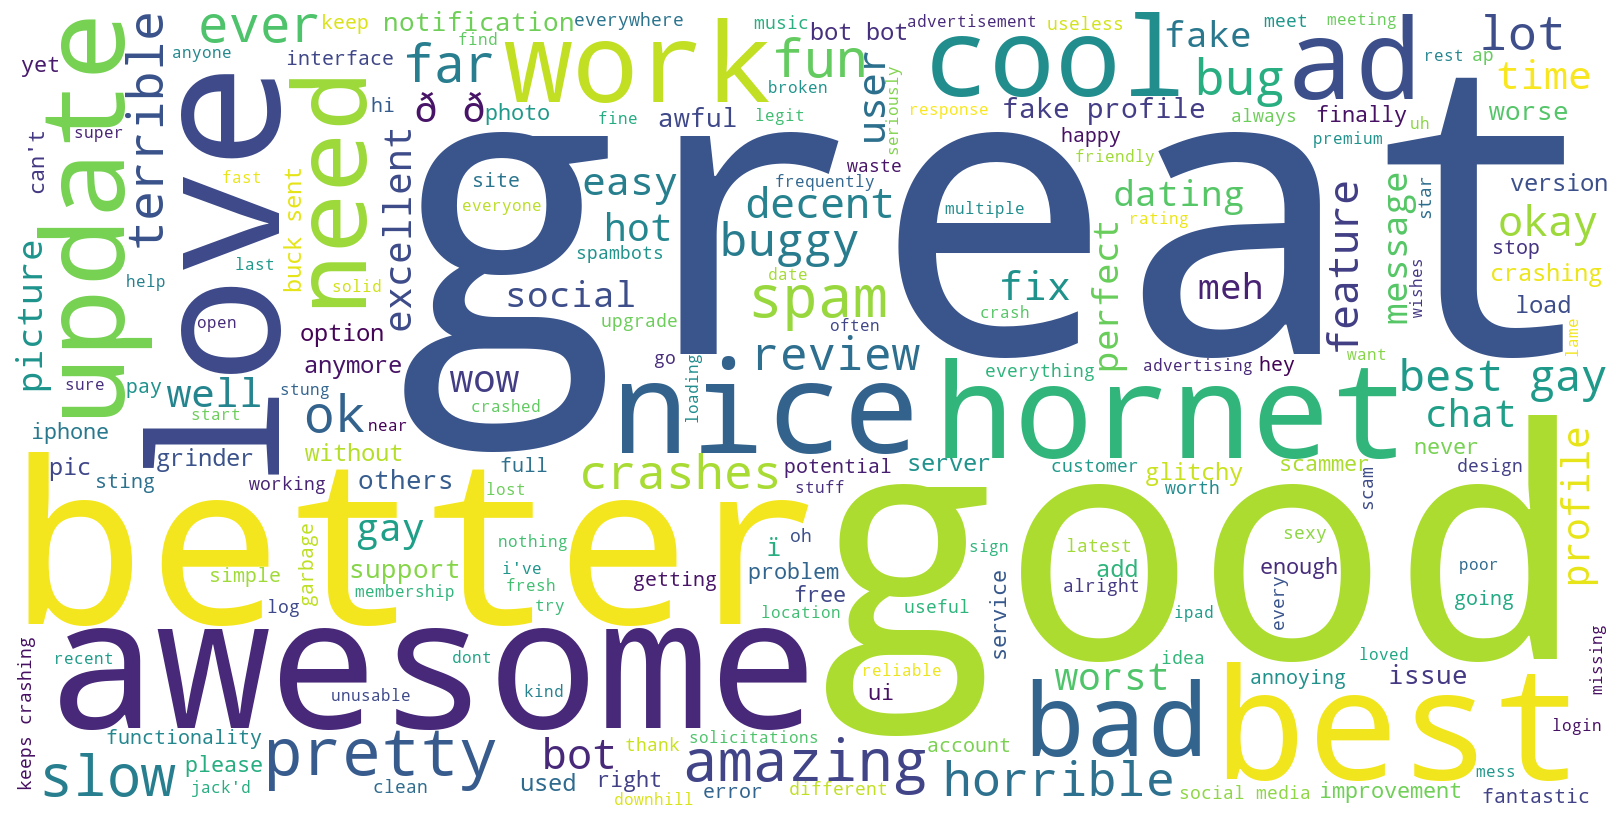

In [2]:
import pandas as pd
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt

class WordCloudGenerator:
    """
    A class that generates a word cloud from a CSV file.
    """
    def __init__(self, file_path: str, new_stopwords: list):
        """
        Initializes a new instance of the WordCloudGenerator class.
        
        Args:
        file_path (str): the path of the CSV file to generate a word cloud from.
        new_stopwords (list): a list of new stopwords to add to the existing list of stopwords.
        """
        self.df = pd.read_csv(file_path, encoding="latin-1")
        self.comment_words = ''
        self.stopwords = nltk.corpus.stopwords.words('english')
        self.stopwords.extend(new_stopwords)

    def generate_word_cloud(self):
        """
        Generates a word cloud from the CSV file.
        """
        word_count = {}
        # iterate through the csv file and split the string into single words
        for val in self.df.title:
            # typecast each val to string
            val = str(val)

            # split the value
            tokens = val.split()

            # Converts each token into lowercase
            for i in range(len(tokens)):
                tokens[i] = tokens[i].lower()

            self.comment_words += " ".join(tokens) + " "

        # define the parameters for the wordcloud graph
        wordcloud = WordCloud(width=1600, height=800,
                              background_color='white',
                              stopwords=self.stopwords,
                              min_font_size=10).generate(self.comment_words)

        # plot the WordCloud image
        plt.figure(figsize=(16, 8), facecolor=None)
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.tight_layout(pad=0)
        plt.show()


new_stopwords = ["grindr", "dona", "t", "ita", "ia", "a", "m",
                 "donâ", "t", "itâ", "iâ", "â", "app", "canâ",
                 "get", "even", "really", "said", "also", "phone", "wonâ",
                 "thatâ", "youâ", "know", "scruff", "like", "would", "still",
                 "much", "use", "apps", "guy", "guys", "people", "didnâ", "look",
                 "see", "many", "u", "could", "way", "something", "i'm", "say",
                 "one", "though", "new", "doesnâ"]

grindr_wc = WordCloudGenerator("grindr_reviews.csv", new_stopwords)
grindr_wc.generate_word_cloud()

scruff_wc = WordCloudGenerator("scruff_reviews.csv", new_stopwords)
scruff_wc.generate_word_cloud()

hornet_wc = WordCloudGenerator("hornet_reviews.csv", new_stopwords)
hornet_wc.generate_word_cloud()


In [7]:
#install and import the relevant libraries and packages
!conda install pytorch torchvision torchaudio -c pytorch -y
!pip install transformers requests beautifulsoup4 pandas numpy
!pip install torchvision 

import pandas as pd
import torch
import requests
from bs4 import BeautifulSoup
import re
from transformers import AutoTokenizer, AutoModelForSequenceClassification

class SentimentAnalyzer:
    """
    Class for sentiment analysis using BERT-based model.
    Args:
    model_name (str): Name of the pre-trained BERT-based model to be used. Default is 'nlptown/bert-base-multilingual-uncased-sentiment'.

    Attributes:
    tokenizer: Instance of the AutoTokenizer class from transformers package for tokenizing input text.
    model: Instance of the AutoModelForSequenceClassification class from transformers package for sentiment analysis.

    Methods:
    sentiment_score(review): Method for calculating sentiment score of a given review text using the pre-trained model.
    """
    def __init__(self, model_name='nlptown/bert-base-multilingual-uncased-sentiment'):
        self.tokenizer = AutoTokenizer.from_pretrained(model_name)
        self.model = AutoModelForSequenceClassification.from_pretrained(model_name)

    def sentiment_score(self, review):
        """
        Method to calculate sentiment score of a given review text.

        Args:
        review (str): Text of the review to be analyzed.

        Returns:
        Integer: Sentiment score of the input review text (1-5).
        """
        tokens = self.tokenizer.encode(review, return_tensors='pt')
        result = self.model(tokens)
        return int(torch.argmax(result.logits)) + 1

class ReviewSentimentAnalyzer:
    """
    Class for sentiment analysis of a collection of reviews using BERT-based model.
    Args:
    model_name (str): Name of the pre-trained BERT-based model to be used. Default is 'nlptown/bert-base-multilingual-uncased-sentiment'.

    Attributes:
    analyzer: Instance of the SentimentAnalyzer class for sentiment analysis of individual reviews.

    Methods:
    analyze_reviews(review_csv_file_path): Method for analyzing sentiment of a collection of reviews given in a CSV file.
    """

    def __init__(self, model_name='nlptown/bert-base-multilingual-uncased-sentiment'):
        self.analyzer = SentimentAnalyzer(model_name)
        
    def analyze_reviews(self, review_csv_file_path):
        """
        Method for analyzing sentiment of a collection of reviews given in a CSV file.

        Args:
        review_csv_file_path (str): File path of the CSV file containing the reviews.

        Returns:
        DataFrame: Pandas DataFrame object containing the reviews along with their sentiment scores.
        """
        df = pd.read_csv(review_csv_file_path)
        df['sentiment'] = df['review'].apply(lambda x: self.analyzer.sentiment_score(x[:512]))
        return df


In [11]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

#Load reviews from a CSV file into a pandas dataframe
hornet_reviews = pd.read_csv('hornet_reviews.csv')
#Add a new column called 'sentiment' to the dataframe by applying the sentiment_score method to the 'review' column
#The sentiment_score method uses a BERT model to predict the sentiment of the text, but only uses the first 512 characters
hornet_reviews['sentiment'] = df['review'].apply(lambda x: sentiment_score(x[:512]))
#Save the dataframe with the added sentiment column to a new CSV file
#The index column is excluded by setting index=False
hornet_reviews.to_csv('sentiment_hornet.csv', index=False)

grindr_reviews = pd.read_csv('grindr_reviews.csv')
grindr_reviews['sentiment'] = grindr_reviews['review'].apply(lambda x: sentiment_score(x[:512]))
grindr_reviews.to_csv('sentiment_grindr.csv', index=False)

scruff_reviews = pd.read_csv('scruff_reviews.csv')
scruff_reviews['sentiment'] = scruff_reviews['review'].apply(lambda x: sentiment_score(x[:512]))
scruff_reviews.to_csv('sentiment_scruff.csv', index=False)